In [ ]:
token_check = []
token_dict = {}
for i in range(len(token_pack)):
        token_list = token_pack[i]['input_ids']

        for token in token_list:
                if token not in token_check:
                        token_check.append(token)
                        token_dict[str(token)] = np.zeros(len(x_train))
                token_dict[str(token)][i] += 1                                    
token_df = pd.DataFrame(token_dict)
token_df

x_train.reset_index(inplace = True,  drop = True)
x_train = pd.concat([x_train,token_df], axis = 1)

Investigating language

In [ ]:
#decoding headers
decode_header = [tokenizer.decode(token_df.columns[i]) for i in range(len(token_df.columns))]

In [ ]:
#creating decoded data frame
decode_df = token_df.copy()
decode_df.columns = decode_header

y_train_concat = y_train.reset_index(drop = True)
decode_df = pd.concat([decode_df, y_train_concat], axis = 1)
decode_df

,[CLS],[SEP] [CLS] [SEP] [UNK],[MASK] [SEP],[SEP] b _,? b,a [UNK] [MASK],c? [UNK] [CLS],c [UNK] [PAS]?,b a c [UNK],[MASK] a [MASK] c,...,a [UNK] [SEP] [UNK],_ _,_?? [SEP],[MASK] c [MASK] [UNK],[CLS] [CLS] [CLS] b,? c [MASK] [CLS],? [MASK] [PAS] b,[MASK]? [MASK] b,b a [SEP] [SEP],label
0,1.0,1.0,5.0,5.0,8.0,25.0,24.0,9.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1670,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1671,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
fake_decode_df = decode_df.where(decode_df['label'] == 0).dropna().drop('label', axis = 1)
real_decode_df = decode_df.where(decode_df['label'] == 1).dropna().drop('label', axis = 1)
sum_fake_tokens = fake_decode_df.sum()
sum_real_tokens = real_decode_df.sum()
sum_total_tokens = decode_df.sum()

In [ ]:
fake_token_pct = (sum_fake_tokens/sum_total_tokens).sort_values(ascending = False)
fake_token_pct

c? a [CLS]             1.0
? [CLS] [CLS] [UNK]    1.0
? [CLS] [UNK] [CLS]    1.0
c? [MASK]?             1.0
[SEP] [SEP] [PAS]?     1.0
                      ... 
c [UNK] b [PAS]        0.0
a a [UNK] [SEP]        0.0
c? [UNK] [CLS]         0.0
c [SEP] c?             0.0
label                  NaN
Length: 9550, dtype: float64

In [ ]:
real_token_pct = (sum_real_tokens/sum_total_tokens).sort_values(ascending = False)
real_token_pct

_ [CLS] [MASK] [CLS]    1.0
c [PAS] a [UNK]         1.0
a [SEP] a b             1.0
_ [PAS] b?              1.0
a [CLS] [UNK] [CLS]     1.0
                       ... 
a b [MASK] [MASK]       0.0
c c [PAS] a             0.0
[UNK] _? [CLS]          0.0
c _ [SEP] [PAS]         0.0
label                   NaN
Length: 9550, dtype: float64

#### Scaling data

In [ ]:
token_sum = pd.DataFrame(token_df.sum().sort_values(ascending = False))

Text(0, 0.5, 'Frequency')

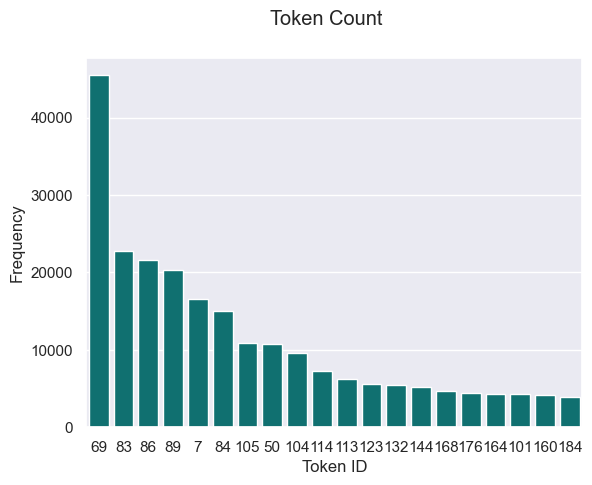

In [ ]:
sns.barplot(token_sum[:20].T , color = 'teal')
plt.suptitle('Token Count')
plt.xlabel('Token ID')
plt.ylabel('Frequency')

As you can see the data is highly skewed left. This means it's best practice to apply some form of normalisation

In [ ]:
#import scalers
from sklearn.preprocessing import QuantileTransformer

In [ ]:
qt = QuantileTransformer(n_quantiles=100, random_state = 42)
token_scaled = pd.DataFrame(qt.fit_transform(token_df), 
                            columns = token_df.columns)

Text(0, 0.5, 'Normalised Count')

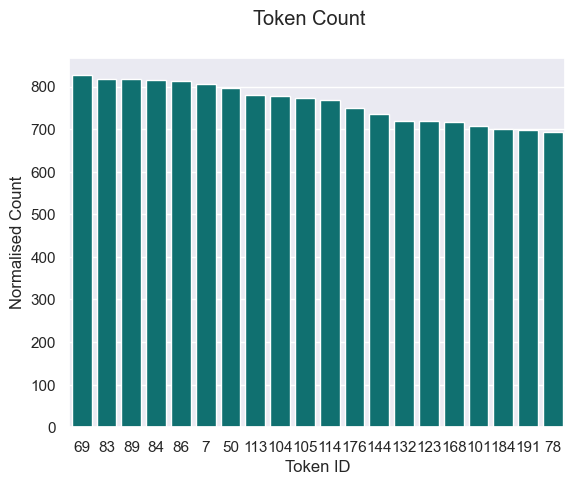

In [ ]:
token_scaled_sum = pd.DataFrame(token_scaled.sum().sort_values(ascending = False))
sns.barplot(token_scaled_sum[:20].T , color = 'teal')
plt.suptitle('Token Count')
plt.xlabel('Token ID')
plt.ylabel('Normalised Count')

### Modelling
Now apply different models to determine which can best detect fake news. But first, a bit more data prep:

We are going to drop all columns excluding image data and NLP data

In [ ]:
#creating data frame for training
x_train1 = pd.concat([token_scaled, x_train['hasImage']], axis = 1)
x_train1

,4,2421,32,286,58,713,9514,9105,8791,3739,...,7121,66,6552,3931,4448,5934,5308,3538,8722,hasImage
0,0.0,0.979798,0.994949,0.991582,0.994388,1.0,1.0,1.0,1.0,0.997114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.000000,0.991582,0.000000,0.000000,0.0,0.0,0.0,0.0,0.949495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.979798,0.984848,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.949495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1670,0.0,0.000000,0.000000,0.924242,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1671,0.0,0.000000,0.000000,0.000000,0.898990,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1672,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Prepping testing data with pretrained BERT and scaling **blind**

In [ ]:
#blindly prepping x_test
token_pack_test = [tokenizer(x_test.iloc[i,2]) for i in range(len(x_test))]

In [ ]:
x_test_df = pd.DataFrame(columns = token_df.columns)   
x_test_df       

,4,2421,32,286,58,713,9514,9105,8791,3739,...,3648,7121,66,6552,3931,4448,5934,5308,3538,8722


In [ ]:
token_check = []
token_dict_test = {}
for i in range(len(token_pack_test)):
        token_list = token_pack[i]['input_ids']

        for token in token_list:
                if token not in token_check:
                        token_check.append(token)
                        token_dict_test[str(token)] = np.zeros(len(x_test))
                token_dict_test[str(token)][i] += 1  

In [ ]:
token_test_df = pd.DataFrame(token_dict_test)
test_concat = pd.concat([x_test_df, token_test_df], axis = 0)
test_concat.fillna(value = 0, inplace = True)
test_concat_scaled = pd.DataFrame(qt.fit_transform(test_concat), columns = test_concat.columns)

/var/folders/d7/c45vs6n11xb04j29p_jkmypw0000gn/T/ipykernel_3482/3478926607.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_concat = pd.concat([x_test_df, token_test_df], axis = 0)


In [ ]:
x_test.reset_index(inplace = True, drop = True)
x_test1 = pd.concat([test_concat, x_test['hasImage']], axis = 1)

In [ ]:
x_test1

,4,2421,32,286,58,713,9514,9105,8791,3739,...,7121,66,6552,3931,4448,5934,5308,3538,8722,hasImage
0,1.0,1.0,5.0,5.0,8.0,25.0,24.0,9.0,8.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
417,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_train1 = pd.concat([token_df,x_train['hasImage']], axis = 1)
x_train1

,4,2421,32,286,58,713,9514,9105,8791,3739,...,7121,66,6552,3931,4448,5934,5308,3538,8722,hasImage
0,1.0,1.0,5.0,5.0,8.0,25.0,24.0,9.0,8.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1670,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1671,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
